## Assignment 1 Hacktiv8 (Visualisasi Data)

### Import Library

In [1]:
#import Library
import numpy as np
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

 Melakukan impor modul (library) yang digunakan dalam analisis data dan visualisasi

### Membaca Data CSV

In [2]:
# Membaca file csv
london_crime = pd.read_csv("Dataset/london_crime.csv")

Code diatas digunakan untuk membaca file csv yang disebut "london_crime.csv" dan menyimpannya sebagai variabel london_crime

### Melihat 5 Data Teratas

In [3]:
london_crime.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


Menampilkan 5 data teratas dari dataset London Crime 2008-2016

### Melihat 5 Data Terbawah

In [4]:
london_crime.tail()

,lsoa_code,borough,major_category,minor_category,value,year,month
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5
13490603,E01003413,Merton,Violence Against the Person,Wounding/GBH,0,2015,6


Menampilkan 5 data terbawah dari dataset London Crime 2008-2016 dengan fungsi tail().

### Menampilkan Informasi Dataset

In [5]:
london_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


Code diatas digunakan untuk menampilkan informasi tentang DataFrame london_crime, termasuk jumlah baris dan kolom, jenis data pada setiap kolom, jumlah nilai non-null, dan penggunaan memori

### Menampilkan Daftar Kolom Data

In [6]:
london_crime.columns

Index(['lsoa_code', 'borough', 'major_category', 'minor_category', 'value',
       'year', 'month'],
      dtype='object')

Code diatas digunakan untuk menampilkan daftar kolom dalam DataFrame london_crime.

### Menampilkan Dimensi Data

In [7]:
london_crime.shape

(13490604, 7)

Code diatas digunakan untuk menampilkan dimensi (jumlah baris dan kolom) dari DataFrame london_crime, dari output dapat dilihat bahwa data terdiri dari 13490604 baris dan 7 kolom

### Mengubah Nama Kolom

In [8]:
london_crime.rename(columns={"borough": "Region", "value": "Total"}, inplace=True)

Mengubah nama kolom borough dan Value guna mempermudah proses mengingat kolom pada data

In [9]:
london_crime.head(2)

,lsoa_code,Region,major_category,minor_category,Total,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11


Melihat perubahan pada nama kolom yang sudah diubah dengan melihat 2 data teratas

### Menghapus Kolom yang Tidak Digunakan

In [10]:
london_crime.drop(["lsoa_code"], axis=1, inplace=True)
london_crime.head(2)

,Region,major_category,minor_category,Total,year,month
0,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,Greenwich,Violence Against the Person,Other violence,0,2016,11


Code diatas digunakan untuk menghapus kolom "lsoa_code" dari DataFrame, dengan axis=1 yang digunakan untuk menandakan bahwa yang akan dihapus adalah kolom, bukan baris. Kemudian ditampilkan 2 data teratas untuk melihat perubahan.

### Menampilkan Informasi Statistik dari Data

In [11]:
london_crime.describe()

,Total,year,month
count,1.349060e+07,1.349060e+07,1.349060e+07
mean,4.779444e-01,2.012000e+03,6.500000e+00
std,1.771513e+00,2.581989e+00,3.452053e+00
min,0.000000e+00,2.008000e+03,1.000000e+00
25%,0.000000e+00,2.010000e+03,3.750000e+00
50%,0.000000e+00,2.012000e+03,6.500000e+00
75%,1.000000e+00,2.014000e+03,9.250000e+00
max,3.090000e+02,2.016000e+03,1.200000e+01


Code diatas digunakan untuk menampilkan ringkasan statistik deskriptif dari kolom-kolom numerik dalam DataFrame london_crime, seperti jumlah data, rata-rata, standar deviasi, nilai minimum dan maksimum, serta quartil.

### Menampilkan Nilai NULL dari Data

In [12]:
london_crime.isnull().sum()

Region            0
major_category    0
minor_category    0
Total             0
year              0
month             0
dtype: int64

Code diatas digunakan untuk menghitung jumlah nilai kosong (missing values) pada setiap kolom dalam DataFrame, dari output dapat dilihat bahwa data ini tidak terdapat missing value. 

### Menampilkan beberapa Keunikan Data

In [13]:
#menampilkan jumlah wilayah yang unik dalam kolom "Region"
print(london_crime["Region"].nunique())

#menampilkan sebuah array yang berisi wilayah unik dalam kolom "Region"
print(london_crime["Region"].unique())

33
['Croydon' 'Greenwich' 'Bromley' 'Redbridge' 'Wandsworth' 'Ealing'
 'Hounslow' 'Newham' 'Sutton' 'Haringey' 'Lambeth' 'Richmond upon Thames'
 'Hillingdon' 'Havering' 'Barking and Dagenham' 'Kingston upon Thames'
 'Westminster' 'Hackney' 'Enfield' 'Harrow' 'Lewisham' 'Brent' 'Southwark'
 'Barnet' 'Waltham Forest' 'Camden' 'Bexley' 'Kensington and Chelsea'
 'Islington' 'Tower Hamlets' 'Hammersmith and Fulham' 'Merton'
 'City of London']


Code diatas digunakan untuk melihat jumlah wilayah yang unik dan daftar wilayahnya

In [14]:
#menampilkan jumlah kejahatan utama yang unik dalam kolom "major_category"
print(london_crime["major_category"].nunique())

#menampilkan sebuah array yang berisi kejahatan utama unik dalam kolom "major_category"
print(london_crime["major_category"].unique())

9
['Burglary' 'Violence Against the Person' 'Robbery' 'Theft and Handling'
 'Criminal Damage' 'Drugs' 'Fraud or Forgery' 'Other Notifiable Offences'
 'Sexual Offences']


Code diatas digunakan untuk melihat jumlah kejahatan utama yang unik dan daftar kejahatannya

In [15]:
print(london_crime["minor_category"].nunique())
print(london_crime["minor_category"].unique())

32
['Burglary in Other Buildings' 'Other violence' 'Personal Property'
 'Other Theft' 'Offensive Weapon' 'Criminal Damage To Other Building'
 'Theft/Taking of Pedal Cycle' 'Motor Vehicle Interference & Tampering'
 'Theft/Taking Of Motor Vehicle' 'Wounding/GBH' 'Other Theft Person'
 'Common Assault' 'Theft From Shops' 'Possession Of Drugs' 'Harassment'
 'Handling Stolen Goods' 'Criminal Damage To Dwelling'
 'Burglary in a Dwelling' 'Criminal Damage To Motor Vehicle'
 'Other Criminal Damage' 'Counted per Victim' 'Going Equipped'
 'Other Fraud & Forgery' 'Assault with Injury' 'Drug Trafficking'
 'Other Drugs' 'Business Property' 'Other Notifiable' 'Other Sexual'
 'Theft From Motor Vehicle' 'Rape' 'Murder']


Code diatas digunakan untuk melihat jumlah kejahatan minor yang unik dan daftar kejahatannya

# VISUALISASI

### Line & Area Plot

In [16]:
london_crime.head()

,Region,major_category,minor_category,Total,year,month
0,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,Bromley,Violence Against the Person,Other violence,0,2015,5
3,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,Wandsworth,Robbery,Personal Property,0,2008,6


Melihat 5 data teratas untuk dilakukan analisis sebelum visualisasi

In [17]:
# Membuat dataframe df3 yang merupakan hasil pengelompokkan berdasarkan kategori utama (major_category) dan tahun (year) dari dataframe london_crime
# Data yang dipilih hanya data dengan tahun <= 2011
# Data yang ditampilkan hanya kolom 'Total'
df3= london_crime[(london_crime['year'] <= 2011)].groupby(['major_category','year'])['Total'].sum()

# Menampilkan dataframe df3
df3

major_category               year
Burglary                     2008     88092
                             2009     90619
                             2010     86826
                             2011     93315
Criminal Damage              2008     91872
                             2009     85565
                             2010     77897
                             2011     70914
Drugs                        2008     68804
                             2009     60549
                             2010     58674
                             2011     57550
Fraud or Forgery             2008      5325
                             2009         0
                             2010         0
                             2011         0
Other Notifiable Offences    2008     10112
                             2009     10644
                             2010     10768
                             2011     10264
Robbery                      2008     29627
                             2009     2956

Code diatas digunakan untuk membuat DataFrame baru yang berisi hasil pengelompokan dan penjumlahan data dalam kolom 'Total' berdasarkan kolom 'major_category' dan 'year' pada DataFrame london_crime dimana nilai tahun (year) tidak lebih besar dari 2011. Tujuan dilakukankan analisis ini adalah untuk menampilkan data kejahatan utama dalam 4 tahun pertama (saat data dikumpulkan).

In [18]:
# Menghitung jumlah kemunculan setiap nilai dalam kolom 'major_category' pada dataframe london_crime menggunakan metode value_counts()
# Mengambil 5 nilai teratas dari hasil penghitungan tersebut dengan menggunakan metode head(5)
london_crime['major_category'].value_counts().head(5)

Theft and Handling             3966300
Violence Against the Person    3171744
Criminal Damage                2069172
Drugs                          1179468
Burglary                       1043604
Name: major_category, dtype: int64

Code diatas untuk melihat seberapa banyak kejahatan utama yang dilakukan dalam rentang tahun 2008-2016, dan ditampilkan hanya 5 kejahatan dengan nilai tertinggi.

In [19]:
# Membuat dataframe baru untuk kelima kategori kejahatan diatas dengan menggunakan masing-masing kategori dari dataframe 'df3'
# Mengubah kolom 'Total' menjadi nama masing-masing kategori pada dataframe menggunakan metode rename()
# Menampilkan dataframe menggunakan print()
major1 = df3['Theft and Handling'].to_frame()
major1.rename(columns={'Total':'Theft and Handling'}, inplace = True)
print(major1)
print('\n')

major2 = df3['Violence Against the Person'].to_frame()
major2.rename(columns={'Total':'Violence Against the Person'}, inplace = True)
print(major2)
print('\n')

major3 = df3['Criminal Damage'].to_frame()
major3.rename(columns={'Total':'Criminal Damage'}, inplace = True)
print(major3)
print('\n')

major4 = df3['Drugs'].to_frame()
major4.rename(columns={'Total':'Drugs'}, inplace = True)
print(major4)
print('\n')

major5 = df3['Burglary'].to_frame()
major5.rename(columns={'Total':'Burglary'}, inplace = True)
print(major5)
print('\n')

      Theft and Handling
year                    
2008              283692
2009              279492
2010              290924
2011              309292


      Violence Against the Person
year                             
2008                       159844
2009                       160777
2010                       157894
2011                       146901


      Criminal Damage
year                 
2008            91872
2009            85565
2010            77897
2011            70914


      Drugs
year       
2008  68804
2009  60549
2010  58674
2011  57550


      Burglary
year          
2008     88092
2009     90619
2010     86826
2011     93315




Kemudian dari hasil yang sebelumnya, dipisahkan nilai kelima kejahatan utama tersebut berdasarkan data 4 tahun pertama (saat data dikumpulkan). Selanjutnya semua data dalam dataframe baru agar lebih mudah dipahami.

In [20]:
# Menggabungkan dataframe 'major1', 'major2', 'major3', 'major4', dan 'major5' secara horizontal (axis=1) menjadi dataframe baru 'df_major'
df_major = pd.concat([major1, major2, major3, major4, major5], axis=1)

df_major

,Theft and Handling,Violence Against the Person,Criminal Damage,Drugs,Burglary
year,,,,,
2008,283692,159844,91872,68804,88092
2009,279492,160777,85565,60549,90619
2010,290924,157894,77897,58674,86826
2011,309292,146901,70914,57550,93315


Kelima dataframe yang sudah dibentuk sebelumnya dijadikan satu dataframe dengan menggunakan fungsi pada pandas yaitu concat(), dan digunakan axis=1 agar terbentuk dalam kolom-kolom yang terpisah. 

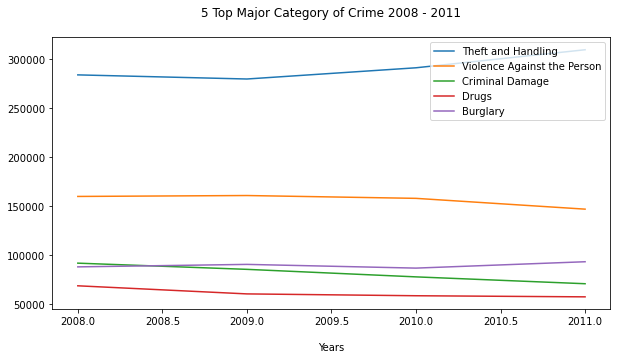

In [21]:
# Membuat plot garis (line plot) dengan menggunakan dataframe 'df_major'
df_major.plot(kind='line', figsize=(10,5)) # Ukuran plot (figsize) diatur menjadi 10 x 5 inci

plt.title('5 Top Major Category of Crime 2008 - 2011\n') # Menambahkan judul plot, label sumbu Y, dan label sumbu X 
plt.xlabel('\nYears') 
plt.show() # Menampilkan plot menggunakan fungsi 'show()'


Selanjutnya, nilai yang terdapat pada dataframe sebelumnya akan di plot dengan line plot untuk melihat tren yang terjadi selama 4 tahun pertama. Pada hasil line plot dapat dilihat bahwa data kejahatan Theft and Handling memiliki nilai tertinggi dari kejatahan lain, dan nilai tersebut terus melonjak naik pada tahun 2011. Untuk data kejahatan lain di 4 tahun pertama masih terlihat cukup stabil dengan tidak adanya perubahan yang cukup signifikan, namun untuk data Violence Against the Person dan Criminal Damage mengalami penurunan seiring berjalannya waktu selama 4 tahun tersebut. 

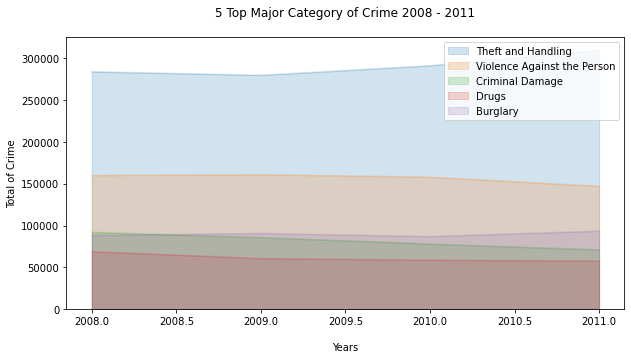

In [22]:
# Membuat plot area dengan menggunakan dataframe 'df_major'
# Alpha digunakan untuk mengatur transparansi warna menjadi 0.2
# Stacked diatur menjadi False agar area plot tidak tumpang tindih
# Ukuran plot diatur menjadi 10 x 5 inci
df_major.plot(kind='area', alpha=0.20, stacked=False, figsize=(10,5))

# Menambahkan judul plot, label sumbu Y, dan label sumbu X 
# Menampilkan plot menggunakan fungsi 'show()'
plt.title('5 Top Major Category of Crime 2008 - 2011\n')
plt.ylabel('Total of Crime')
plt.xlabel('\nYears')
plt.show()


Kemudian, line plot tadi dibentuk dalam area plot guna menunjukkan total yang berubah dari waktu ke waktu dalam kategori kejahatan utama, serta membantu melihat kontribusi dari setiap kategori pada total keseluruhan. Area plot diatas menunjukkan visualisasi yang sama dengan line plot sebelumnya. 

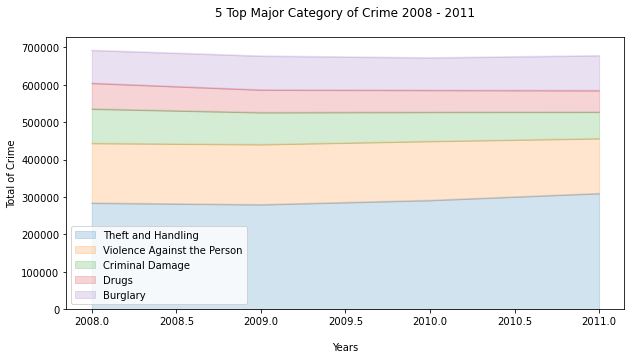

In [23]:
#Stacked diatur menjadi True untuk menampilkan stacked area plot dengan data yang ditumpuk
df_major.plot(kind='area', alpha=0.20, stacked=True, figsize=(10,5))

plt.title('5 Top Major Category of Crime 2008 - 2011\n')
plt.ylabel('Total of Crime')
plt.xlabel('\nYears')
plt.show()

Area plot sebelumnya dibentuk kedalam area plot dengan stack (tumpukan)

In [24]:
# Membuat dataframe df4 yang merupakan hasil pengelompokkan berdasarkan kategori utama (major_category) dan tahun (year) dari dataframe london_crime
# Data yang dipilih hanya data dengan tahun <= 2011
# Data yang ditampilkan hanya kolom 'Total'
df4 = london_crime[(london_crime['year'] >= 2013)].groupby(['major_category','year'])['Total'].sum()

# Menampilkan dataframe df4
df4

major_category               year
Burglary                     2013     87222
                             2014     76053
                             2015     70489
                             2016     68285
Criminal Damage              2013     56206
                             2014     59279
                             2015     62976
                             2016     64071
Drugs                        2013     50278
                             2014     44435
                             2015     39785
                             2016     38914
Fraud or Forgery             2013         0
                             2014         0
                             2015         0
                             2016         0
Other Notifiable Offences    2013     10811
                             2014     13037
                             2015     14229
                             2016     15809
Robbery                      2013     29337
                             2014     2215

Code diatas digunakan untuk membuat DataFrame baru yang berisi hasil pengelompokan dan penjumlahan data dalam kolom 'Total' berdasarkan kolom 'major_category' dan 'year' pada DataFrame london_crime dimana nilai tahun (year) lebih besar dari 2013. Tujuan dilakukankan analisis ini adalah untuk menampilkan data kejahatan utama dalam 4 tahun terakhir (saat data berhenti dikumpulkan).

In [25]:
# Membuat dataframe baru untuk kelima kategori kejahatan dengan menggunakan masing-masing kategori dari dataframe 'df4' 
major1_2 = df4['Theft and Handling'].to_frame()
major1_2.rename(columns={'Total':'Theft and Handling'}, inplace = True)

major2_2 = df4['Violence Against the Person'].to_frame()
major2_2.rename(columns={'Total':'Violence Against the Person'}, inplace = True)

major3_2 = df4['Criminal Damage'].to_frame()
major3_2.rename(columns={'Total':'Criminal Damage'}, inplace = True)

major4_2 = df4['Drugs'].to_frame()
major4_2.rename(columns={'Total':'Drugs'}, inplace = True)

major5_2 = df4['Burglary'].to_frame()
major5_2.rename(columns={'Total':'Burglary'}, inplace = True)

# Menggabungkan dataframe secara horizontal (axis=1) menjadi dataframe baru 'df_major2'
df_major2 = pd.concat([major1_2, major2_2, major3_2, major4_2, major5_2], axis=1)
df_major2

,Theft and Handling,Violence Against the Person,Criminal Damage,Drugs,Burglary
year,,,,,
2013,306372,146181,56206,50278,87222
2014,279880,185349,59279,44435,76053
2015,284022,218740,62976,39785,70489
2016,294133,232381,64071,38914,68285


Membuat dataframe-dataframe baru untuk menampung data 5 kejahatan utama berdasarkan rentang tahun 2013-2016 (4 tahun terakhir)

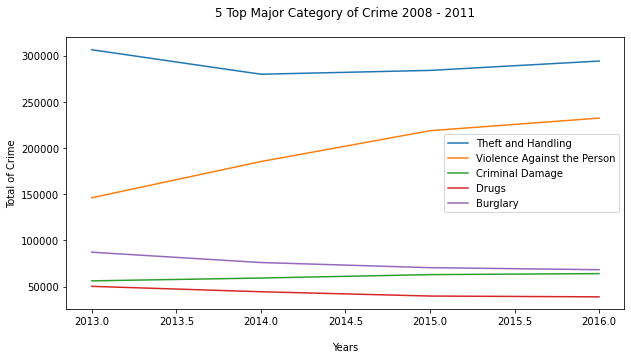

In [26]:
# Membuat plot garis (line plot) dengan menggunakan dataframe 'df_major2'
df_major2.plot(kind='line', figsize=(10,5))

plt.title('5 Top Major Category of Crime 2008 - 2011\n')
plt.ylabel('Total of Crime')
plt.xlabel('\nYears')
plt.show()

Menampilkan 5 data tertinggi pada kejahatan utama dengan line plot untuk rentang tahun 2013-2016 (4 tahun terakhir). Pada hasil plot dapat dilihat bahwa data Theft and Handling mengalami penurunan pada tahun 2014, namun setelahnya data kembali mengalami kenaikan. Untuk data Violence Against the Person mengalami kenaikan yang sangat signifikan pada rentang 4 tahun tersebut dan puncak tertinggi berada pada tahun 2016. Sementara untuk data kejahatan lainnya tren masih stabil (tidak terjadi kenaikan dan penurunan yang drastis). 

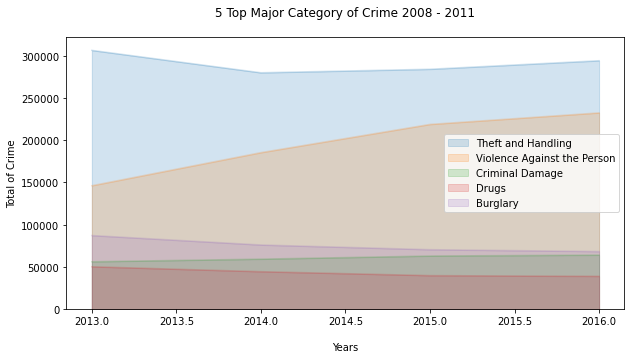

In [27]:
# Membuat plot area dengan menggunakan dataframe 'df_major2'
df_major2.plot(kind='area', alpha=0.20, stacked=False, figsize=(10,5))

plt.title('5 Top Major Category of Crime 2008 - 2011\n')
plt.ylabel('Total of Crime')
plt.xlabel('\nYears')
plt.show()

Area plot diatas merupakan area plot yang merepresentasikan data yang sama dengan line plot sebelumnya. 

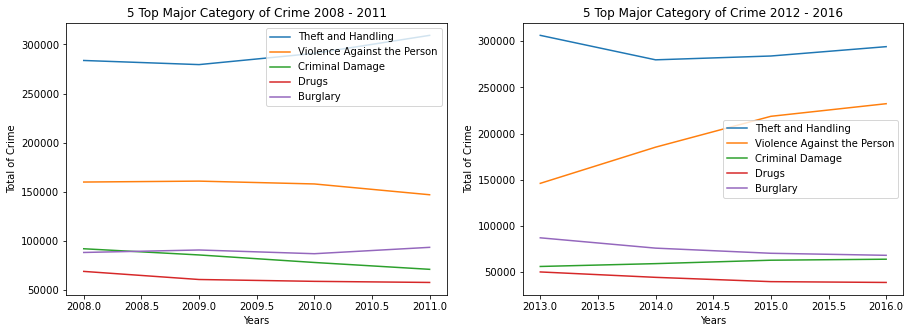

In [28]:
# membuat subplot dengan ukuran 1x2
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# plot pertama
df_major.plot(kind='line', ax=ax[0])
ax[0].set_title('5 Top Major Category of Crime 2008 - 2011')
ax[0].set_xlabel('Years')
ax[0].set_ylabel('Total of Crime')

# plot kedua
df_major2.plot(kind='line', ax=ax[1])
ax[1].set_title('5 Top Major Category of Crime 2012 - 2016')
ax[1].set_xlabel('Years')
ax[1].set_ylabel('Total of Crime')

# menampilkan plot
plt.show()


Menampilkan 2 plot untuk dilakukan perbandingan antara data kejahatan utama di 4 tahun awal dengan data 4 tahun terakhir. Dari kedua plot diatas dapat dilihat bahwa perbedaan signifikan antara kedua plot tersebut terdapat pada kategori Theft and Handling dan Violence Against the Person. Sedangkan untuk data Bulgary pada 4 tahun awal mengalami kenaikan namun pada 4 tahun terakhir mengalami penurunan. Dan data Criminal Damage mengalami perbedaan 4 tahun awal terdapat penurunan, sedangkan 4 tahun terakhir mengalami kenaikan. 

### Histogram

In [29]:
# membuat data frame untuk data Region pada tahun 2010-2014
df_his1 = london_crime[(london_crime['year']==2010)].groupby(['Region'])[['Total']].sum()

df_his2 = london_crime[(london_crime['year']==2011)].groupby(['Region'])[['Total']].sum()

df_his3 = london_crime[(london_crime['year']==2012)].groupby(['Region'])[['Total']].sum()

df_his4 = london_crime[(london_crime['year']==2013)].groupby(['Region'])[['Total']].sum()

df_his5 = london_crime[(london_crime['year']==2014)].groupby(['Region'])[['Total']].sum()

df_hist = pd.concat([df_his1, df_his2, df_his3, df_his4, df_his5], axis=1)

df_hist


,Total,Total,Total,Total,Total
Region,,,,,
Barking and Dagenham,17130,16686,15990,15759,15426
Barnet,23416,24007,23573,22510,22572
Bexley,13166,11325,11669,11552,11844
Brent,25512,27669,26357,23759,24426
Bromley,19572,19868,19622,18945,19668
Camden,31804,33956,31472,28435,27198
City of London,0,69,157,110,115
Croydon,29373,29830,30189,27444,27357
Ealing,31360,29537,28832,25917,24978


Kode di atas bertujuan untuk membuat kolom baru untuk masing-masing tahun dimana memuat jumlah kasus untuk masing-masing wilayah (wilayah sebagai index). Kemudian dataframe tersebut digabung menjadi 1 untuk selanjutnya dilakukan pembentukan histogram. 

Text(0.5, 1.0, 'Histogram of Crime from 5 Region\n')

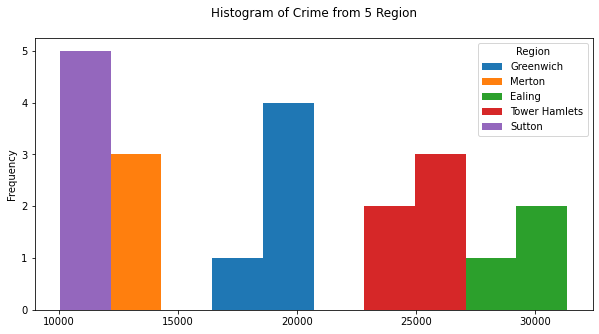

In [30]:
df_hist.loc[['Greenwich', 'Merton', 'Ealing', 'Tower Hamlets', 'Sutton']].T.plot(kind='hist', figsize=(10,5))

plt.title("Histogram of Crime from 5 Region\n")

Histogram diatas menunjukkan persebaran data untuk 5 kota yaitu Greenwich, Merton, Ealing, Tower Hamlets, dan Sutton. Dapat dilihat bahwa data tersebar dengan kurang merata karena datanya bertumpuk pada suatu area range saja. Untuk wilayah Sutton dapat dilihat bahwa ada sebanyak 5 data yang berada pada range 10000-15000 yang artinya di setiap tahun (2010-2014) angka kejahatan di kota tersebut berada dalam rentang 10000-15000. Untuk wilayah Merton berada pada range yang sama dengan wilayah sutton. Sama halnya dengan wilayah lain namu berada dalam rentang yang berbeda. 

### Bar Chart

In [31]:
#menghitung jumlah kemunculan setiap nilai unik dalam suatu kolom dalam bentuk Series
df1 = london_crime['major_category'].value_counts()

df1

Theft and Handling             3966300
Violence Against the Person    3171744
Criminal Damage                2069172
Drugs                          1179468
Burglary                       1043604
Robbery                         939384
Other Notifiable Offences       776304
Fraud or Forgery                236520
Sexual Offences                 108108
Name: major_category, dtype: int64

Code diatas digunakan untuk menghitung jumlah kemunculan kategori kejahatan utama 

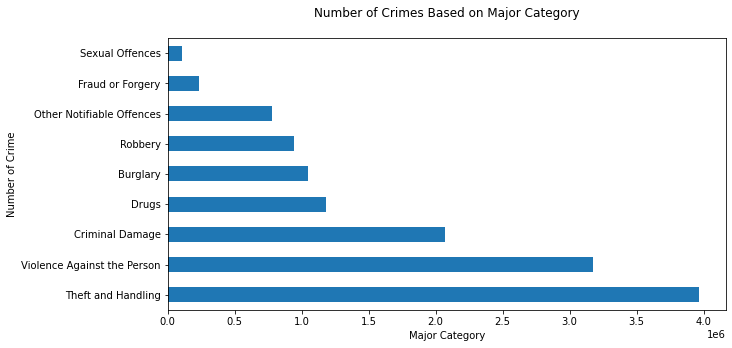

In [33]:
# Menampilkan plot horizontal bar dari dataframe df1
# dengan ukuran gambar 10 x 5 inci
df1.plot(kind='barh', figsize=(10,5))

# Menetapkan label untuk sumbu x
plt.xlabel("Major Category")

# Menetapkan label untuk sumbu y
plt.ylabel("Number of Crime")

# Menetapkan judul untuk plot
plt.title("Number of Crimes Based on Major Category\n")

# Menampilkan plot
plt.show()

BarChart diatas ditampilkan dalam bentuk horizontal untuk melihat persebaran data kejahatan utama untuk keseluruhan data. Dari barchart diatas dapat dilihat bahwa Theft and Handling merupakan kejahatan dengan nilai tertinggi di london. Kemudian diurutan kedua terdapat Violence Against the Person dan dilanjutkan dengan kejahatan-kejahatan lainnya, dimana kejahatan dengan nilai terendah adalah Sexual Offences. 

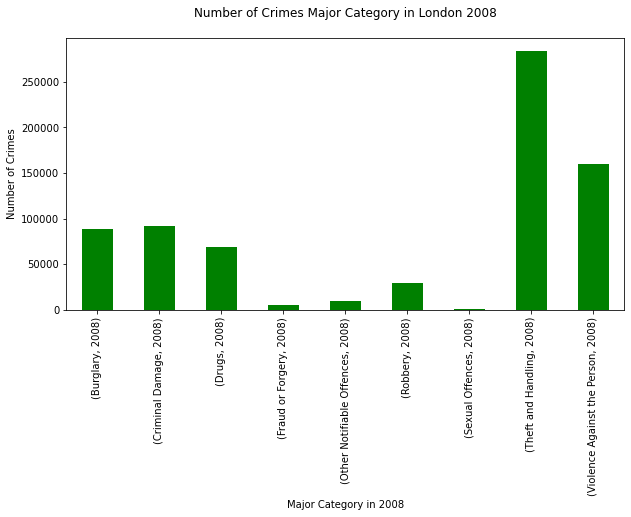

In [34]:
# Membuat dataframe df2 yang merupakan hasil pengelompokkan berdasarkan kategori utama (major_category) dan tahun (year) dari dataframe london_crime
# Hanya data pada tahun 2008 yang dipilih
# Data yang ditampilkan hanya kolom 'Total'
df2 = london_crime[(london_crime['year'] == 2008)].groupby(['major_category','year'])['Total'].sum()

# Menampilkan plot bar dari dataframe df2 dengan warna hijau dan ukuran gambar 10 x 5 inci
df2.plot(kind='bar', color='green', figsize=(10,5))

# Menetapkan label untuk sumbu x
plt.xlabel('Major Category in 2008')

# Menetapkan label untuk sumbu y
plt.ylabel('Number of Crimes')

# Menetapkan judul untuk plot
plt.title('Number of Crimes Major Category in London 2008\n')

# Menampilkan plot
plt.show()

Barchart diatas ditampilkan dalam bentuk vertikal menunjukkan data kejahatan utama di london pada tahun 2008 (tahun pertama data dikumpulkan). Dari barchart tersebut dapat dilihat bahwa Theft and Handling memiliki nilai tertinggi dengan lebih dari 250000 kejahatan dan yang paling kecil nilainya dimiliki oleh kejahatan Sexual Offences dengan nilai jauh dibawah 5000 kejahatan. 

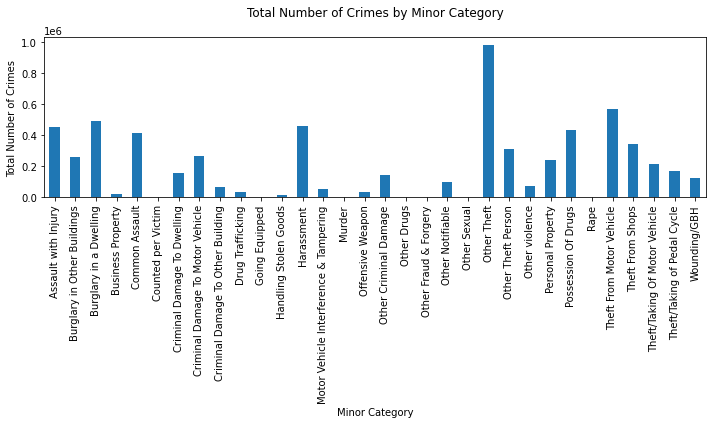

In [35]:
# Kelompokkan data berdasarkan kategori minor dan hitung jumlah total kejahatan untuk setiap kategori
grouped_data = london_crime.groupby('minor_category')['Total'].sum()

# membuat plot
grouped_data.plot(kind='bar', figsize=(10,6))

# membuat judul
plt.title('Total Number of Crimes by Minor Category\n')
plt.xlabel('Minor Category')
plt.ylabel('Total Number of Crimes')

# Sesuaikan tata letak
plt.tight_layout()

plt.show()

Barchart diatas ditampilkan dalam bentuk vertikal untuk melihat persebaran angka kejahatan berdasarkan kejahatan minor atau turunan dari kejahatan utama. 

### Pie Chart

In [36]:
london_crime.head()

,Region,major_category,minor_category,Total,year,month
0,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,Bromley,Violence Against the Person,Other violence,0,2015,5
3,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,Wandsworth,Robbery,Personal Property,0,2008,6


In [37]:
# Mengelompokkan dataframe 'london_crime' berdasarkan kolom 'Region' dan kemudian menjumlahkan kolom 'Total' untuk setiap wilayah
df_region = london_crime.groupby(['Region'])[['Total']].sum().reset_index()

# Mengubah nama kolom 'Total' pada dataframe 'df_region' menjadi 'total of crime'
df_region = df_region.rename(columns={'Total':'Total of crime'})

df_region

,Region,Total of crime
0,Barking and Dagenham,149447
1,Barnet,212191
2,Bexley,114136
3,Brent,227551
4,Bromley,184349
5,Camden,275147
6,City of London,780
7,Croydon,260294
8,Ealing,251562
9,Enfield,193880


Code diatas digunakan untuk mengelompokkan data pada dataframe london_crime berdasarkan nilai unik pada kolom Region dan kemudian menjumlahkan nilai pada kolom Total untuk setiap wilayah. Hasilnya disimpan pada dataframe df_region.

In [38]:
# Mengurutkan nilai berdasarkan Total of crime
df_region = df_region.sort_values(by=['Total of crime'], ascending=False)

df_region

,Region,Total of crime
32,Westminster,455028
21,Lambeth,292178
27,Southwark,278809
5,Camden,275147
24,Newham,262024
7,Croydon,260294
8,Ealing,251562
18,Islington,230286
29,Tower Hamlets,228613
3,Brent,227551


Melakukan pengurutan berdasarkan angka Total of Crime untuk melihat data yang terurut.

In [39]:
# Mengambil 7 data teratas dengan nilai tertinggi
df_region_top7 = df_region.head(7)

df_region_top7

,Region,Total of crime
32,Westminster,455028
21,Lambeth,292178
27,Southwark,278809
5,Camden,275147
24,Newham,262024
7,Croydon,260294
8,Ealing,251562


Menggunakan 7 data Region teratas dengan angka Total of crime tertinggi untuk selanjutnya dilakukan visualisasi

<AxesSubplot:ylabel='Total of crime'>

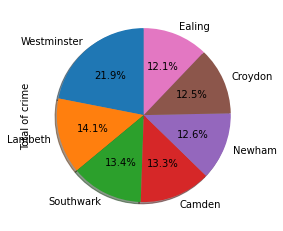

In [40]:
# Menampilkan Pie Chart dengan 7 data (nilai tertinggi)
df_region_top7['Total of crime'].plot(
    kind='pie', 
    labels=df_region_top7['Region'], 
    autopct='%1.1f%%', 
    startangle=90, 
    shadow=True
)


Dibentuk Pie Chart untuk melihat persebaran persen berdasarkan 7 data teratas region sebelumnya, namun pie chart ini masih sedikit kurang mudah dipahami dan kurang menarik. 

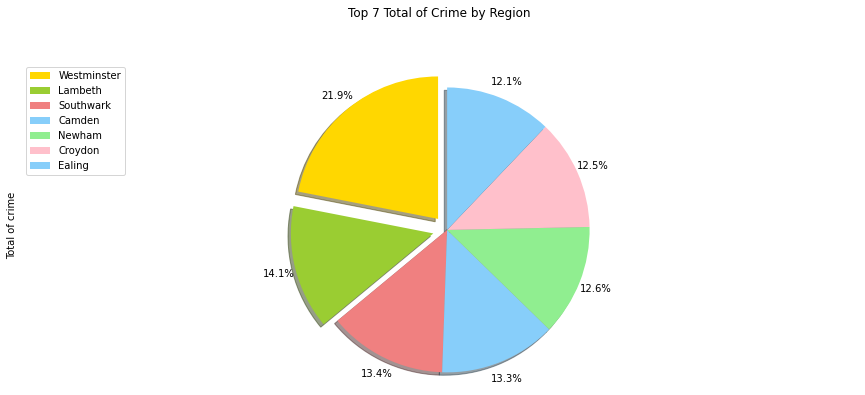

In [41]:
# Menampilkan Pie Chart berdasarkan warna yang ditentukan
color_list = ["gold", "yellowgreen", "lightcoral", "lightskyblue", "lightgreen","pink", "lightskyblue"]

# Menampilkan chart yang menarik dan lebih mudah dipahami
df_region_top7['Total of crime'].plot(
    kind='pie'
    ,figsize=(15,6)
    ,autopct='%1.1f%%'
    ,startangle=90
    ,shadow=True
    ,labels=None
    ,colors=color_list
    ,pctdistance=1.12
    ,explode = [0.1,0.1,0,0,0,0,0]
)

# Menampilkan title untuk chart yang dibuat
plt.title("Top 7 Total of Crime by Region", y=1.12)
plt.axis('equal')
plt.legend(labels=df_region_top7['Region'], loc='upper left')

Pie Chart diatas menggunakan data yang sama seperti pie chart sebelumnya, namun pie chart ini sudah dibentuk lebih menarik dan lebih mudah dipahami. Dimana dari piechart tersebut dapat dilihat bahwa data persen tertinggi terletak pada wilayah Westminster dengan angka 21.9% dari keseluruhan data, hal tersebut menunjukkan bahwa Westminster merupakan wilayah dengan jumlah kejahatan tertinggi di london. 

### Box Plot

In [42]:
# Membuat dataframe Region yang merupakan hasil pengelompokkan berdasarkan kategori (Region) dan tahun (year) dari dataframe london_crime
# Data yang dipilih hanya data dengan tahun >= 2012
Region = london_crime[(london_crime['year'] >= 2012)].groupby(['Region','year'])['Total'].sum()

Region

Region                year
Barking and Dagenham  2012    15990
                      2013    15759
                      2014    15426
                      2015    16346
                      2016    16741
                              ...  
Westminster           2012    59226
                      2013    53852
                      2014    47564
                      2015    47395
                      2016    48330
Name: Total, Length: 165, dtype: int64

In [43]:
# Membuat dataframe baru untuk 2 kategori Region dengan menggunakan masing-masing kategori Region dari dataframe 'Region'
# Mengubah kolom 'Total' menjadi nama masing-masing kategori pada dataframe menggunakan metode rename()
region1 = Region['Westminster'].to_frame()
region1.rename(columns = {'Total':'Westminster'}, inplace = True)

region2 = Region['Lambeth'].to_frame()
region2.rename(columns = {'Total':'Lambeth'}, inplace = True)

# Menggabungkan dataframe secara horizontal (axis=1) menjadi dataframe baru 'westminster_lambeth'
westminster_lambeth = pd.concat([region1, region2], axis=1)

In [44]:
westminster_lambeth

,Westminster,Lambeth
year,,
2012,59226,33473
2013,53852,31868
2014,47564,31765
2015,47395,33164
2016,48330,34071


Dibentuk dataframe yang berisi nilai jumlah kejahatan di wilayah westminster dan lambeth pada rentang tahun 2012-2016. Pengambilan 2 wilayah tersebut didasari oleh  analisis data sebelumnya yang menunjukkan bahwa 2 wilayah ini merupakan wilayah dengan angka kejahatan tertinggi dibanding wilayah lain. 

In [45]:
westminster_lambeth.describe()

,Westminster,Lambeth
count,5.000000,5.000000
mean,51273.400000,32868.200000
std,5180.691633,1014.576118
min,47395.000000,31765.000000
25%,47564.000000,31868.000000
50%,48330.000000,33164.000000
75%,53852.000000,33473.000000
max,59226.000000,34071.000000


Text(0, 0.5, 'Region')

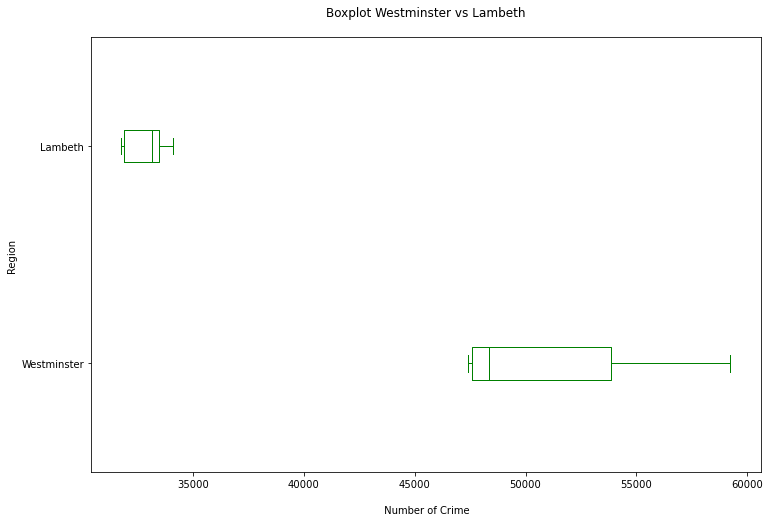

In [46]:
# Menampilkan Boxplot untuk data wilayah Westminster dan lambeth (wilayah dengan nilai kejahatan tertinggi)
westminster_lambeth.plot(kind='box', figsize=(12,8), vert=False, color='green')

# Menampilkan judul
plt.title('Boxplot Westminster vs Lambeth\n')
plt.xlabel('\n Number of Crime')
plt.ylabel('Region')

Boxplot diatas merupakan representasi dari dataframe westmeinster dan lambeth. Dimana pada boxplot tersebut dapat dilihat bahwa lambeth dan westminster memiliki persebaran data yang jauh berbeda. Westminster memiliki nilai kejahatan tertinggi di angka hampir mencapai 60000 dan terendah ada pada kisaran angka +-47000, sedangkan lambeth memiliki nilai kejahatan tertinggi di angka +-34000 dan nilai terendah pada kisaran +-20000 kejahatan. Boxplot sering digunakan dalam analisis data dan statistik untuk secara visual merangkum distribusi dataset dan memberikan cara yang cepat dan mudah untuk mengidentifikasi median, kuartil, dan outlier dari distribusi. 

### Scatter Plot

In [47]:
# Mengelompokkan dataframe 'london_crime' berdasarkan kolom 'major_category' dan 'year' kemudian menjumlahkan kolom 'Total' untuk setiap Tahun
# Data yang digunakan adalah seluruhnya dengan >= 2008
years = london_crime[(london_crime['year'] >= 2008)].groupby(['major_category','year'])['Total'].sum()

In [48]:
years

major_category               year
Burglary                     2008     88092
                             2009     90619
                             2010     86826
                             2011     93315
                             2012     93392
                                      ...  
Violence Against the Person  2012    150014
                             2013    146181
                             2014    185349
                             2015    218740
                             2016    232381
Name: Total, Length: 81, dtype: int64

In [49]:
# Membuat dataframe baru untuk menampung jumlah category 'Theft and Handling' untuk setiap tahunnya
theft_yearly = years['Theft and Handling'].to_frame()

# Mengubah nama Total dengan 'Theft and Handling' agar mudah dipahami
theft_yearly.rename(columns={'Total':'Theft and Handling'}, inplace = True)

In [50]:
theft_yearly

,Theft and Handling
year,
2008,283692
2009,279492
2010,290924
2011,309292
2012,334054
2013,306372
2014,279880
2015,284022
2016,294133


Code diatas digunakan untuk membuat dataframe baru dengan isi persebaran data kejahatan category 'Theft and Handling' untuk setiap tahunnya dalam rentang 2008-2016.

In [51]:
#mengatur kembali indeks dari DataFrame "theft_yearly" 
theft_yearly.reset_index(inplace=True)

Code diatas digunakan untuk membuat index baru agar data mudah divisualisasikan

In [52]:
# Menampilkan range index baru
theft_yearly.index

RangeIndex(start=0, stop=9, step=1)

In [53]:
# Membuat daftar kolom
theft_yearly.columns = ["Year", "Total_TH"]

In [54]:
# Menampilkan dataframe
theft_yearly

,Year,Total_TH
0,2008,283692
1,2009,279492
2,2010,290924
3,2011,309292
4,2012,334054
5,2013,306372
6,2014,279880
7,2015,284022
8,2016,294133


Text(0, 0.5, 'Num of category')

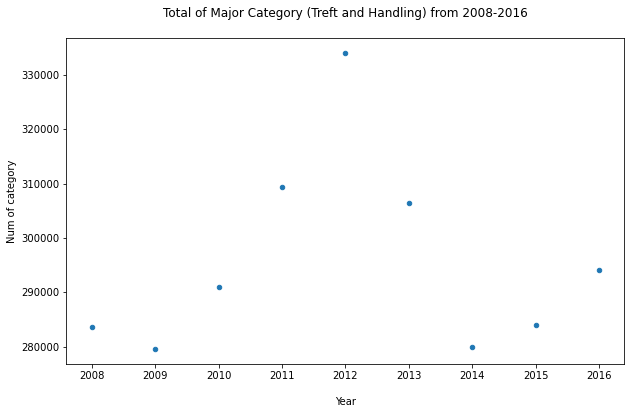

In [55]:
# Membuat scatter plot untuk dataframe theft_yearly
scatter = theft_yearly.plot(
    kind='scatter'
    ,x='Year'
    ,y='Total_TH'
    ,figsize=(10,6)
)

plt.title("Total of Major Category (Treft and Handling) from 2008-2016\n")
plt.xlabel("\nYear")
plt.ylabel("Num of category")

Plot ini biasanya digunakan untuk melihat hubungan dari dua variabel. Dari plot yang dihasilkan dapat disimpulkan bahwa variabel year dan count memiliki hubungan yang rendah. Dapat dilihat dari pergerakan data yang tidak se arah antara variabel year dan Total, dengan kata lain kenaikan atau penurunan salah satu variabel tidak mempengaruhi variabel lainnya. Selain itu juga dapat dilihat persebaran datanya, yaitu data ini tersebar secara acak atau tidak menumpuk pada suatu area. 

### Word Cloud

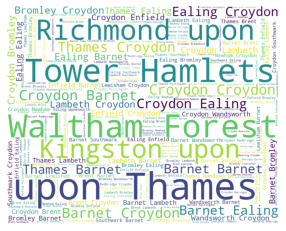

In [56]:
# assign data town ke variable town
region_word = london_crime['Region']

text = ' '.join(region_word)
wordcloud = WordCloud(width = 1000, height = 800, background_color = 'white').generate(text)

# Membangun plot
plt.imshow(wordcloud)
plt.axis("off")

plt.show()

Kode di atas menggunakan data dari kolom Region untuk diolah. Menggunakan fungsi join(), diambil semua nilai dari kolom Region kemudian digabungkan ke dalam satu string dimana ' ' (spasi) digunakan sebagai separator atau pemisah antara nama kotak. Tujuan dari World Clouds ini adalah untuk melihat nama kota mana yang paling sering muncul.

### Folium Maps

In [57]:
import folium

In [58]:
london_folium = folium.Map(location=[51.5072, -0.1275], zoom_start = 10, tiles='Stamen Terrain')
london_folium

Code di atas untuk menampilkan peta london sesuai dengan titik koordinat bujur dan lintang.

### Kesimpulan

Dari analisis dana visualisasi yang sudah ditampilkan diatas, dapat disimpulkan bahwa data crime di London yang ditracking setiap bulan dalam rentang tahun 2008 sampai 2016 tersebar secara tidak merata. Kemudian, tidak ditemukan keterkaitan erat antara variabel-variabel sehingga dapat dipastikan variabel-variabel yang tercatat perubahannya tidak mempengaruhi satu sama lain dengan kata lain tidak ada variabel yang saling terikat. Dan dari analisis yang dilakukan didapatkan bahwa wilayah Westminster merupakan wilayah dengan jumlah kejahatan yang paling dominan, dan jenis kejahatan yang paling tinggi nilainya yaitu Theft and Handling. Kemudian didapatkan pula bahwa wilayah City of London merupakan wilayah dengan jumlah kejahatan yang paling kecil maka dapat dipastika berdasarkan data ini City Of London merupakan wilayah ter-aman di London pada rentang tahun 2008-2016. 